In [24]:
import numpy as np              # for numerical computation of arrays and matrices
import matplotlib.pyplot as plt # matplolib to make figures and visualizations
from PIL import Image           # Pillow Image Library for some image manipulations
from matplotlib.pyplot import figure
import os

In [28]:
# Collects the suqar root of channel color distirbution
# Could be more efficient with numpy
def analyse_rgb(image):
    red = np.zeros(256, np.int)
    green = np.zeros(256, np.int)
    blue = np.zeros(256, np.int)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red[image[i][j][0]] += 1
            green[image[i][j][1]] += 1
            blue[image[i][j][2]] += 1

    return [np.sqrt(red), np.sqrt(green), np.sqrt(blue)]

In [29]:
def quantize(value, q):
    # Beispiel wenn q = 8 mapping:
    # 0-7 -> 4
    # 8-15 -> 12
    # 16-23 -> 20 
    # ...
    return ((value // q) * q) + (q // 2)

def quantize_pixel(pixel, rq, gq, bq):
    return [quantize(pixel[0], rq), quantize(pixel[1], gq), quantize(pixel[2], bq)]

# Diese Funktion ist sehr ineffizient, durch numpy und lineare 
# algebra könnte man das deutlich beschleunigen
def quantize_image(image, rq = 1, gq = 1, bq = 1):
    width, height, _ = image.shape
    
    for i in range(width):
        for j in range(height):
            pixel = image[i,j]
            image[i,j] = quantize_pixel(pixel, rq, gq, bq)

# Beispiel Quantisierung für die Berglandschaft
stimuli_src_path = "./Stimuli/landscape-mountains-1.png"

src_image = np.array(Image.open(stimuli_src_path).convert("RGB"))

quantized_images = []
channel_analysis = []

# Added original as first image
quantized_images.append(src_image)
channel_analysis.append(analyse_rgb(src_image))

# Quantisierungs Stufen
q_stages = [2,8,16,32,64]
for q in q_stages:
    print("Quantizing q = " + str(q) + " and color green")
    quantized_image = src_image.copy()
    quantize_image(quantized_image, gq = q)
    quantized_images.append(quantized_image)
    channel_analysis.append(analyse_rgb(quantized_image))

Quantizing q = 2 and color green
Quantizing q = 8 and color green
Quantizing q = 16 and color green
Quantizing q = 32 and color green
Quantizing q = 64 and color green


In [43]:
# plot image and rgb distribution
def plot_image_and_rgb(ax, i, q, image, r, g, b):
    ax[i][0].imshow(np.array(image))
    ax[i][0].title.set_text("Grün quantisiert mit " + str(q))

    ax[i][1].plot(r, color='r', label='Rot', linewidth=2)
    ax[i][1].plot(g, color='g', label='Grün', linewidth=2)
    ax[i][1].plot(b, color='b', label='Blau', linewidth=2)
    ax[i][1].legend(loc="upper right", fontsize='large')
    ax[i][1].set_xticks(range(0, 255,16))
    ax[i][1].title.set_text("RGB Farbverteilung")
    ax[i][1].spines['right'].set_visible(False)
    ax[i][1].spines['top'].set_visible(False)
    ax[i][1].set(xlabel='RGB Farbraum 0-255', ylabel='Quadratwurzel der Häufigkeiten')
    ax[i][1].set_ylim(ymin=0)
    ax[i][1].set_xlim(xmin=0)

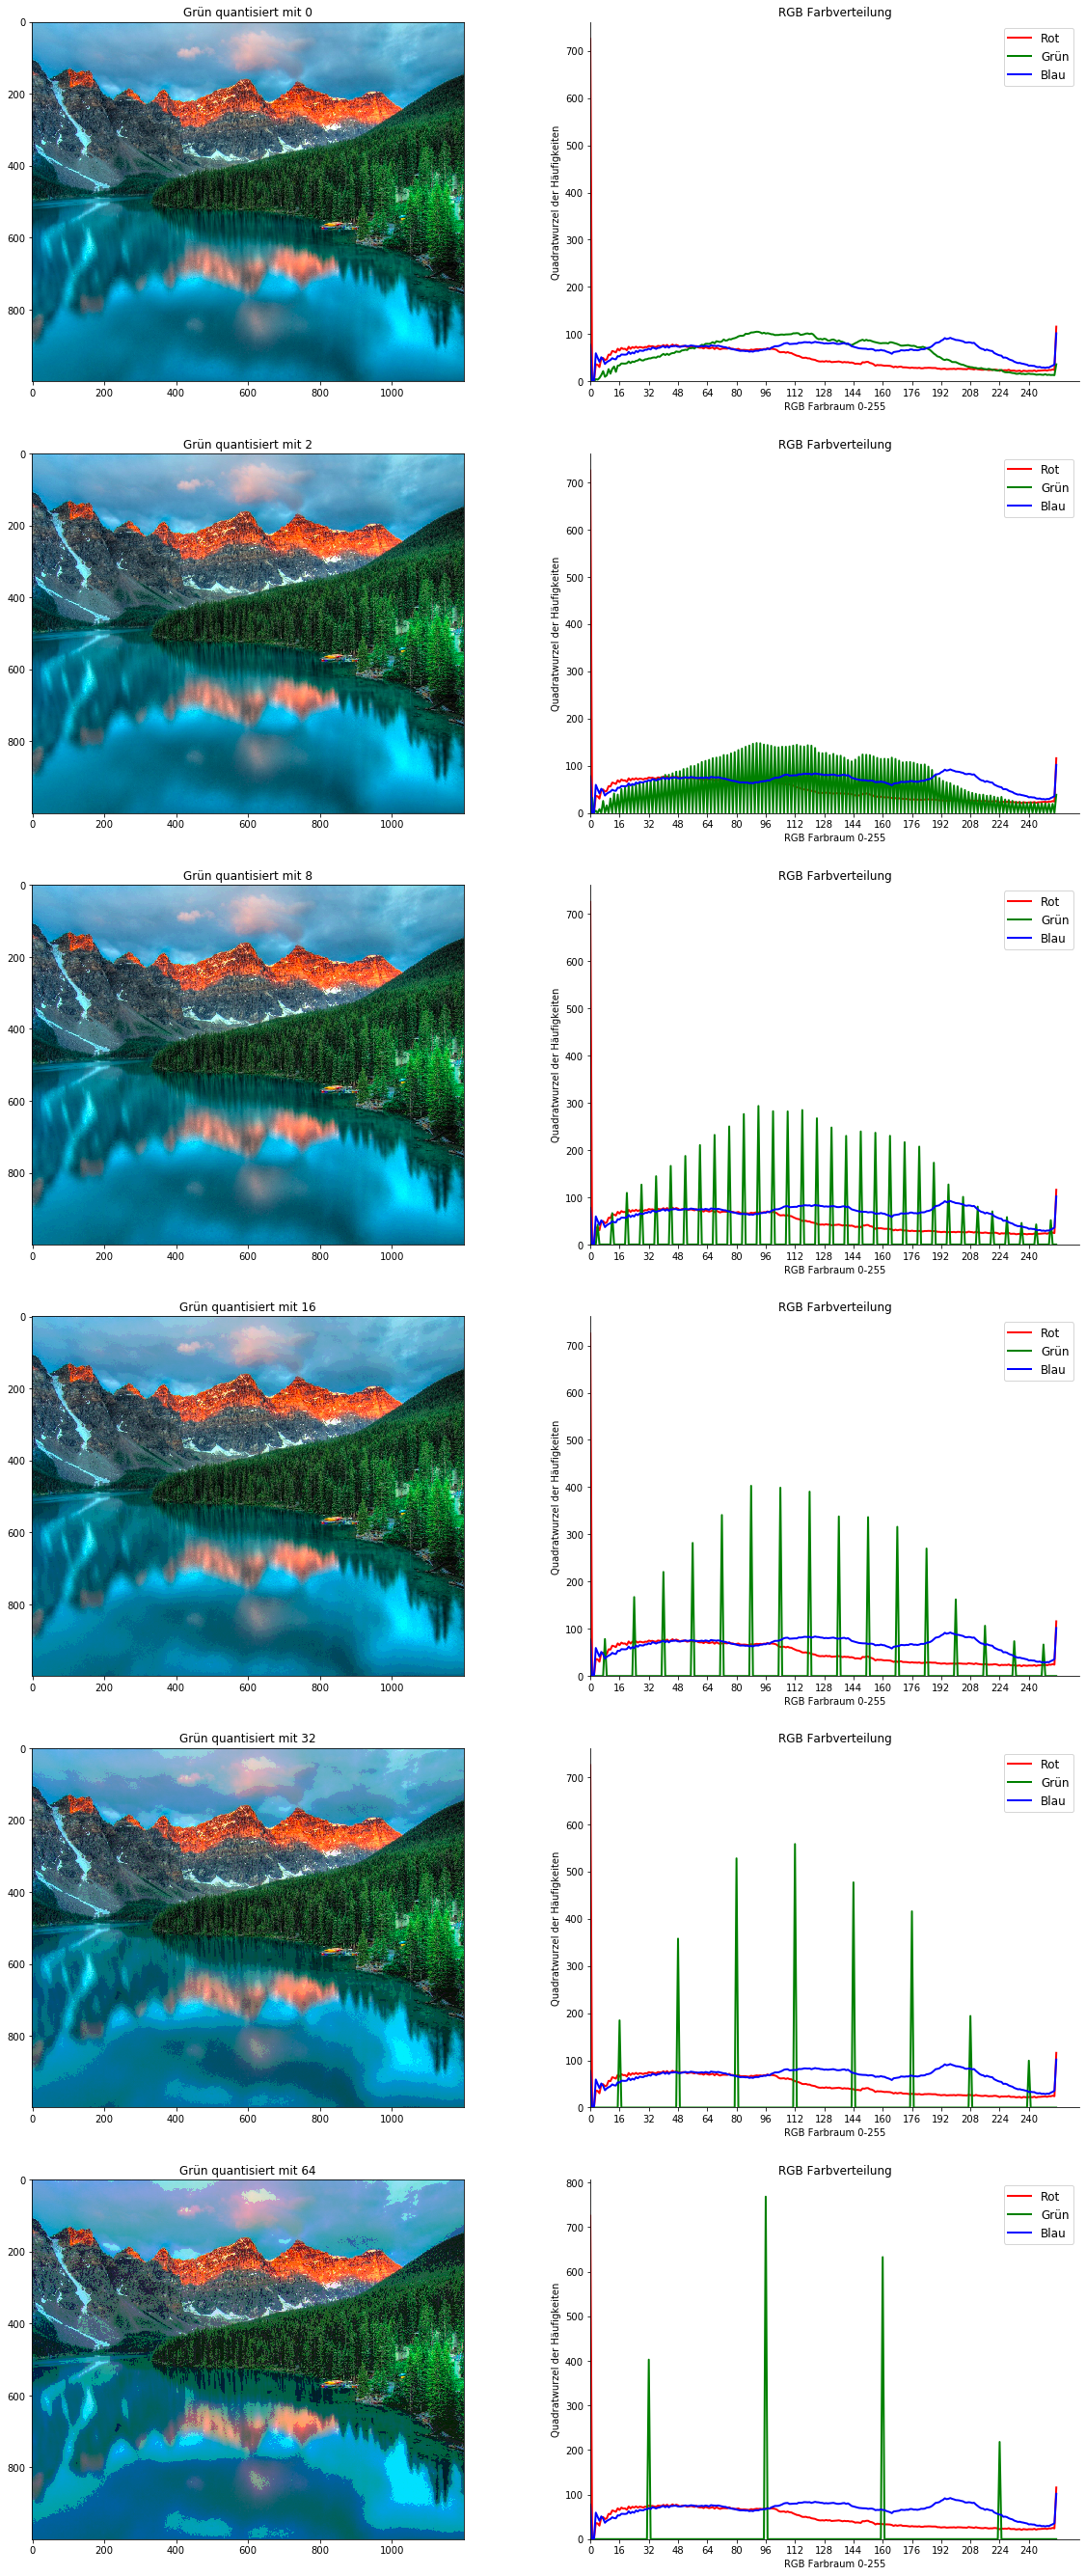

In [52]:
fig, ax = plt.subplots(6,2, figsize=(20,8*6))

# Show original picture
plot_image_and_rgb(ax, 0, 0, quantized_images[0], channel_analysis[0][0], channel_analysis[0][1], channel_analysis[0][2])

# Show quantized images
for i in range(1,len(quantized_images)):
    plot_image_and_rgb(ax, i, q_stages[i-1], quantized_images[i], channel_analysis[i][0], channel_analysis[i][1], channel_analysis[i][2])

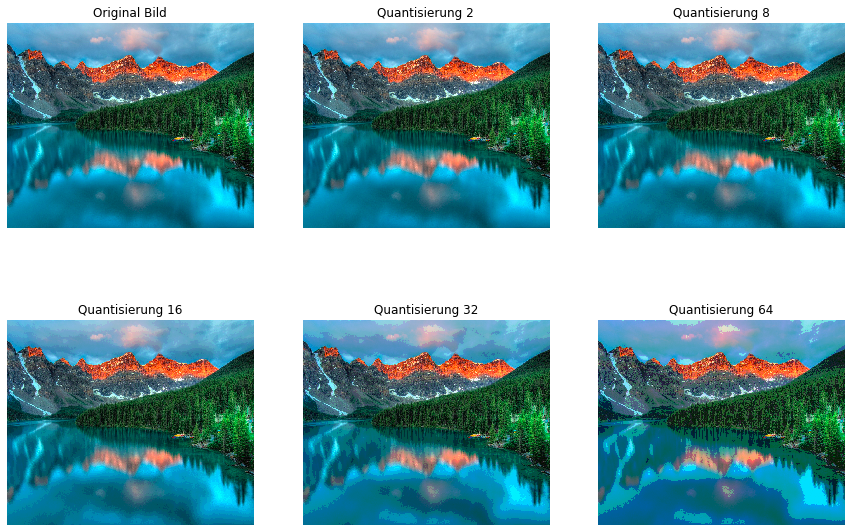

In [53]:
# Plot the quantized sample images
plt.figure(figsize=(15,10))

rows = 2
col = 3

# Plot original
plt.subplot(rows, col , 1)
plt.title('Original Bild')
plt.imshow(quantized_images[0])
plt.axis('off')

for i, q_image in enumerate(quantized_images[1:]):
    plt.subplot(rows, col, i + 2)
    plt.title("Quantisierung " + str(q_stages[i]))
    plt.imshow(q_image)
    plt.axis('off')